
# Project: Investigate a Dataset - [TDMb Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database (TMDb) is a community built movie and TV database. Every piece of data has been added by our amazing community dating back to 2008. TMDb's strong international focus and breadth of data is largely unmatched and something we're incredibly proud of. Put simply, we live and breathe community and that's precisely what makes us different.

In this presentation, based on this dataset various questions will be answered for the curious minds. For example, what is the distribution of movie average vote? who were the top actors, production companies, and movie genres? what are the relationship between popularity, budget and revenue? 

So Lets start exploring the dataset.


In [1]:
# importing libraries and loading the data set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling and Cleaning



### General Properties


In [2]:
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# dataset dimension
df.shape

(10866, 21)

The TMDb dataset contain 10866 rows and 21 columns.

In [5]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# summary of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
# list of columns in the dataset
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

The list of columns in the dataset

In [9]:
# drop columns not needed in dataset
df.drop(['id', 'imdb_id', 'tagline', 'overview', 'keywords', 
         'budget_adj', 'homepage', 'revenue_adj'], axis=1, inplace=True)

The columns id, imdb_id, tagline, overview, keywords, budget_adj, homepage, revenue_adj do not contain useful information, therefore, need to be dropped from the dataset.

In [10]:
# check to verify column has been dropped
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [11]:
# check for duplicates
df.duplicated().sum ()

1

In [12]:
#drop duplicaetes
df.drop_duplicates(inplace=True)

In [13]:
# check for null value in dataset
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [14]:
#fill null values with 0
df.fillna(0,inplace=True)

In [15]:
# check the necessary columns was dropped.
df.shape

(10865, 13)

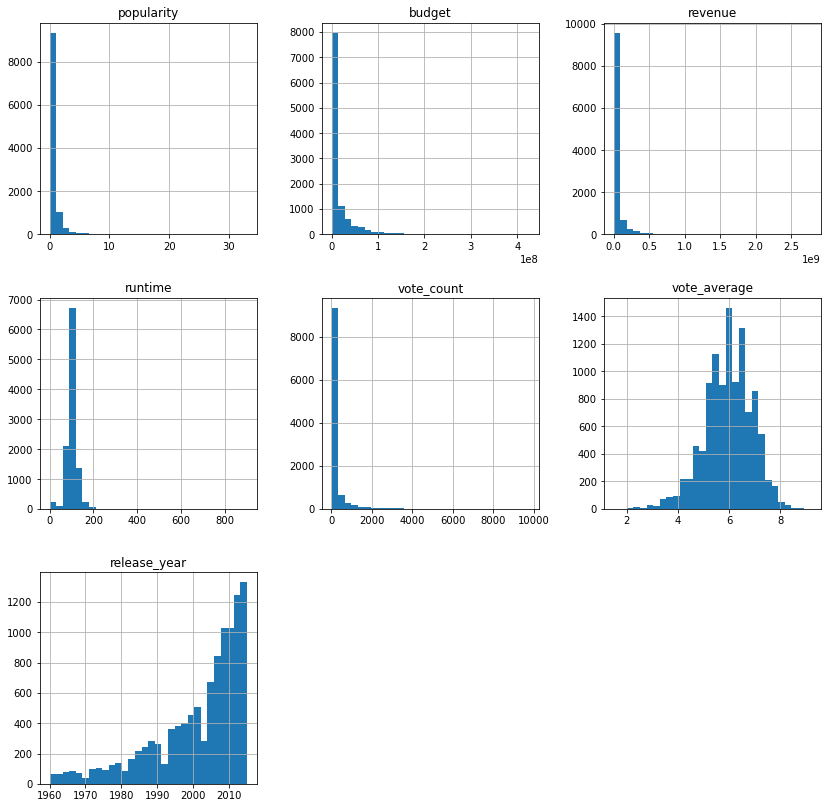

In [16]:
# distribution of the overall dataframe
df.hist(figsize=(14,14), bins=30);

In [18]:
# change release date from string to datetime object
df['release_date'] = pd.to_datetime(df['release_date'])

In [19]:
# replace and drop missing values
df['cast'] = df['cast'].replace(0, np.NaN)
df['director'] = df['director'].replace(0, np. NaN)
df['genres'] = df['genres'].replace(0, np. NaN)
df['production_companies'] =df['production_companies'].replace(0,  np. NaN)

df.dropna(inplace=True)

Replace the cast, director, genre, and production company with NaN ans drop NaN

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: WHAT IS THE RELATIONSHIP BETWEEN BUDGET AND POPULARITY

In [24]:
 # function to plot scatter plot
def create_scatter_plot(x, y):
    df.plot.scatter(x, y)
    plt.title('{} v s {}'.format(x, y))
    return plt.show

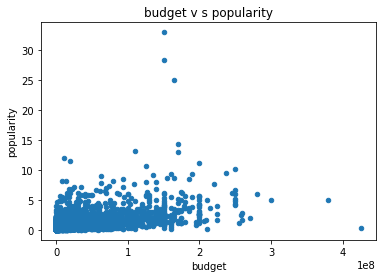

In [25]:
# scatter plot to visualize the relation ship between budget and popularity
x = 'budget'
y = 'popularity'

create_scatter_plot(x, y);

The above scatter plot shows the relationship between budget and popularity.

### Research Question 2: WHAT IS THE RELATIONSHIP BETWEEN POPULARITY AND REVENUE?

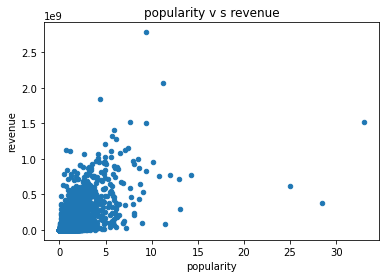

In [26]:
# scatter plot to visualize the relationship between popularity and revenue
x ='popularity'
y = 'revenue'

create_scatter_plot(x, y);

### Research Question 3: WHAT ARE THE TOP 5 GENRES?

In [27]:
# extract the top 5 genres 
df['genres'] = df['genres'].astype(str)
genres_data = df['genres'].str.cat(sep= '|')
genres_data = pd.Series(genres_data.split('|'))
count = genres_data.value_counts(ascending =False)

In [28]:
# list of top 5 genres
genres_count = count
genres_count = pd.DataFrame(genres_count)
top_genres = genres_count.head(5)
top_genres

,0
Drama,4364
Comedy,3433
Thriller,2746
Action,2235
Romance,1570


The top five genres are Drama, Comedy, Thriller, Action, Romance with 4364, 3433, 2746, 2235, 1570 respectively.

### Research Question 4: WHAT IS THE TOP PRODUCTION COMPANY?

In [29]:
# extract the top production company
df['production_companies'] = df['production_companies'].astype(str)
production_companies_data = df['production_companies'].str.cat(sep= '|')
production_companies_data = pd.Series(production_companies_data.split('|'))
count = production_companies_data.value_counts(ascending =False)

In [30]:
# get the top production company
production_companies_count = count
production_companies_count = pd.DataFrame(production_companies_count)
top_production_companies = production_companies_count.head(1)
top_production_companies

,0
Universal Pictures,522


The production company with highest movie produced.

##### Research Question 5: WHO ARE THE TOP 10 CAST?

In [31]:
# extract the top 10 cast
df['cast'] = df['cast'].astype(str)
cast_data = df['cast'].str.cat(sep= '|')
cast_data = pd.Series(cast_data.split('|'))
count = cast_data.value_counts(ascending =False)

In [32]:
# get the count of cast.
cast_count = count
cast_count = pd.DataFrame(cast_count)
top_cast = cast_count.head(10)
top_cast

,0
Robert De Niro,72
Samuel L. Jackson,70
Bruce Willis,62
Nicolas Cage,61
Michael Caine,52
Robin Williams,51
Morgan Freeman,49
John Goodman,48
John Cusack,48
Liam Neeson,47


### Research Question 4: WHAT IS THE DISTRIBUTION OF VOTE AVERAGE?

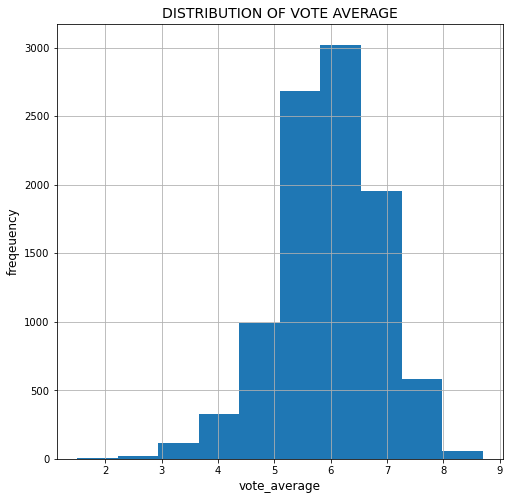

In [33]:
# distribution of vote average
df.hist('vote_average', figsize=(8,8))
plt.title('DISTRIBUTION OF VOTE AVERAGE', fontsize=14)
plt.xlabel('vote_average', fontsize=12)
plt.ylabel('freqeuency', fontsize=12);

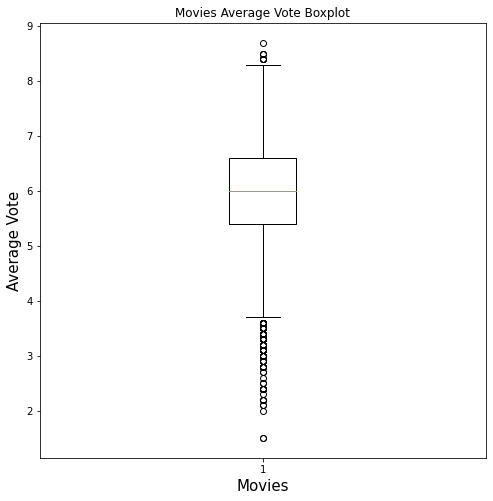

In [34]:
# boxplot for movies vote average.
data = df['vote_average']

fig = plt.figure(figsize=(8,8))
plt.boxplot(data)
plt.title('Movies Average Vote Boxplot')
plt.xlabel('Movies', fontsize=15)
plt.ylabel('Average Vote', fontsize=15);
plt.show();

The above box plot showed that majority of the movies vote avearge were between 5.5 and 6.5.

<a id='conclusions'></a>
## Conclusions

The TMDb movies dataset provides many information on all movies. After Data Wrangling, null values, duplicates and 0 values were removed from the dataset to provide accurate results. Incorrect datatype were corrected.

Histogram and Box plot was made to help visualize and better understand the dataset to answer questions. From the results above, its showed the movies with top cast, genres, and production companies. Also distribution of movie average vote were displayed.

* Average Vote: Average vote is 5.9, with majority between 5.5 and 6.5
* Top Cast: Robert De Niro
* Top Director: Universal Pictures
* Top Genre: Drama

## **Limitations:**

The TDMb movies dataset features were successfully analyzed, there were some information which was removed such as rows containing nulls and 0 values which would definately alter results. Also, there exist some outliers in the dataset which might be as a result of human errors.

## **Sources.**

* Pandas Documentation
* Stackoverflow
* Kaggle guide
* Github Projects